Dataset shape: (307511, 122)

Preview of dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         3

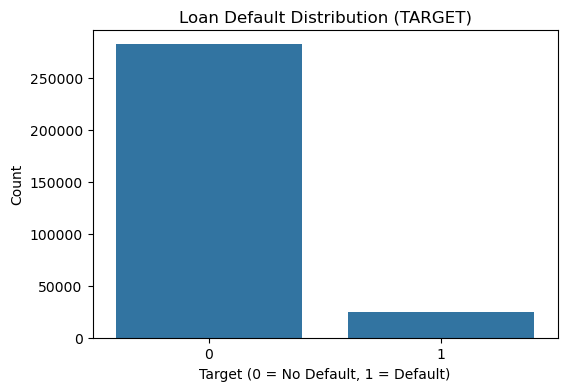

In [4]:
# 🧹 Project 1: Data Cleaning & Preprocessing
# CSCD613 - Machine Learning with Big Data Analytics (Group 10)
# -------------------------------------------------------------
# Objective:
#   Prepare and clean the Home Credit Default Risk dataset (application_train.csv)
#   for use in machine learning models.
#
# Main Tasks:
#   1. Import and explore the dataset
#   2. Check for missing values and duplicates
#   3. Handle missing data appropriately
#   4. Encode categorical features
#   5. Treat outliers
#   6. Normalize or scale numerical features
#   7. Export the cleaned dataset for use in later stages

# -------------------------------------------------------------
# Step 1: Import Libraries
# -------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set display options
pd.set_option('display.max_columns', 100)

# -------------------------------------------------------------
# Step 2: Load the Dataset
# -------------------------------------------------------------

# Load dataset (ensure it's stored in the 'data/' folder)
data = pd.read_csv('data/application_train.csv')

# Display shape and first few rows
print("Dataset shape:", data.shape)
print("\nPreview of dataset:")
print(data.head())

# -------------------------------------------------------------
# Step 3: Basic Data Exploration
# -------------------------------------------------------------

# Overview of dataset
print("\nDataset Info:")
print(data.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe().T)

# Check target variable distribution
print("\nTarget Variable Distribution (%):")
print(data['TARGET'].value_counts(normalize=True) * 100)

# -------------------------------------------------------------
# Step 4: Check for Missing Values
# -------------------------------------------------------------

# Count missing values per column
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent (%)': (missing / len(data)) * 100
})

print("\nTop 15 columns with missing values:")
print(missing_df.head(15))

# -------------------------------------------------------------
# Step 5: Handle Missing Values
# -------------------------------------------------------------

# Drop columns with more than 40% missing values
threshold = 0.4 * len(data)
data = data.loc[:, data.isnull().sum() < threshold]

# Fill numeric columns with median values
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill categorical columns with mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

print("\nMissing values handled. New shape:", data.shape)

# -------------------------------------------------------------
# Step 6: Encode Categorical Features
# -------------------------------------------------------------

# Label encode binary categorical features
le = LabelEncoder()
for col in cat_cols:
    if data[col].nunique() == 2:
        data[col] = le.fit_transform(data[col])

# One-hot encode remaining categorical features
data = pd.get_dummies(data, drop_first=True)

print("\nData shape after encoding:", data.shape)

# -------------------------------------------------------------
# Step 7: Handle Outliers (Example)
# -------------------------------------------------------------

# Example: handle outliers in AMT_INCOME_TOTAL using IQR method
if 'AMT_INCOME_TOTAL' in data.columns:
    Q1 = data['AMT_INCOME_TOTAL'].quantile(0.25)
    Q3 = data['AMT_INCOME_TOTAL'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Cap outliers
    data['AMT_INCOME_TOTAL'] = np.where(
        data['AMT_INCOME_TOTAL'] > upper_limit, upper_limit,
        np.where(data['AMT_INCOME_TOTAL'] < lower_limit, lower_limit, data['AMT_INCOME_TOTAL'])
    )

    print("\nOutliers in AMT_INCOME_TOTAL handled.")

# -------------------------------------------------------------
# Step 8: Scale or Normalize Data
# -------------------------------------------------------------

scaler = StandardScaler()

# Select key numeric columns for scaling (only if present)
num_features = [col for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'] if col in data.columns]
if num_features:
    data[num_features] = scaler.fit_transform(data[num_features])
    print("\nSelected numeric features scaled.")

# -------------------------------------------------------------
# Step 9: Save Cleaned Dataset
# -------------------------------------------------------------

data.to_csv('data/cleaned_application_train.csv', index=False)
print("\nCleaned dataset saved successfully at: data/cleaned_application_train.csv")

# -------------------------------------------------------------
# Step 10: Quick Visualization
# -------------------------------------------------------------

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=data)
plt.title("Loan Default Distribution (TARGET)")
plt.xlabel("Target (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

# -------------------------------------------------------------
# Summary:
# -------------------------------------------------------------
# - Loaded and explored dataset
# - Identified and handled missing values
# - Encoded categorical variables
# - Handled outliers
# - Scaled numeric features
# - Saved cleaned data for next stage
#
# Next notebook → project1_02_feature_engineering.ipynb
